In [1]:
#viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#loop over all simulations
folders = ['nu_1e-11/', 'nu_1e-12/', 'nu_1e-13/']
linewidths = [12, 6, 4, 2]
colors = ['cyan', 'green', 'red', 'purple']
outputs = []
from helper_fns import *
for folder in folders:
    
    #restore output
    inputs_file = folder + 'inputs.py'
    execfile(inputs_file)
    output_path = folder + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(output_path)
    output = (r, t, vr, vt, times, lambda0, shear_viscosity)
    outputs += [output]
    print 'r.shape = ', r.shape
    print 'total_ring_mass = ', total_ring_mass
    print 'shear_viscosity = ', shear_viscosity
    print 'initial_orbits = ', initial_orbits
    print

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-11
initial_orbits =  {'w_prime': 0.125, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.025}

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-12
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.028}

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-13
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.005, 'e_prime': 0.0}



shear_viscosity =  1e-11
viscous_timescale =  4166.869242299103
shear_viscosity =  1e-12
viscous_timescale =  41666.86871949931
shear_viscosity =  1e-13
viscous_timescale =  416666.8686742692


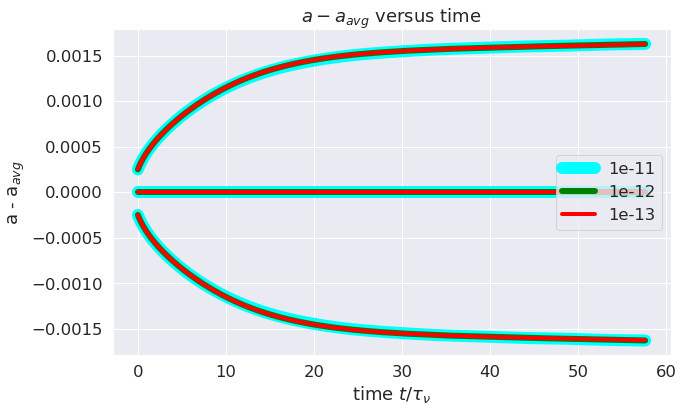

In [4]:
#for each simulation, plot a - a_avg versus viscous time
from libration import *
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    print 'shear_viscosity = ', shear_viscosity
    print 'viscous_timescale = ', viscous_timescale
    
    #plot streamline's mutual a-evolution
    x = times_viscous
    y = a_inner - a_avg
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    y = a_avg - a_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    y = a_outer - a_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    p = ax.set_title(r'$a - a_{avg}$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel('a - a$_{avg}$')
    p = plt.legend(loc='center right')

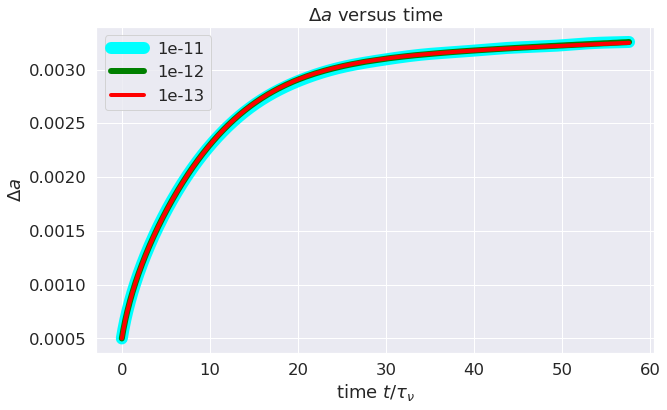

In [5]:
#plot delta_a versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
        
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_a
    x = times_viscous
    y = delta_a
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    p = ax.set_title(r'$\Delta a$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta a$')
    p = plt.legend()

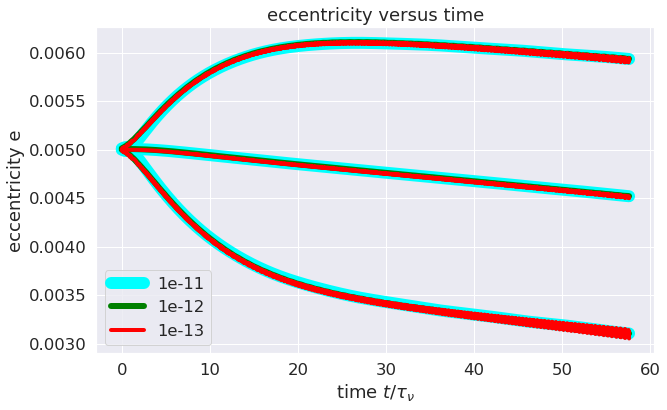

In [6]:
#plot eccentricity versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's mutual e-evolution
    x = times_viscous
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    p = ax.set_title(r'eccentricity versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel('eccentricity e')
    p = plt.legend()

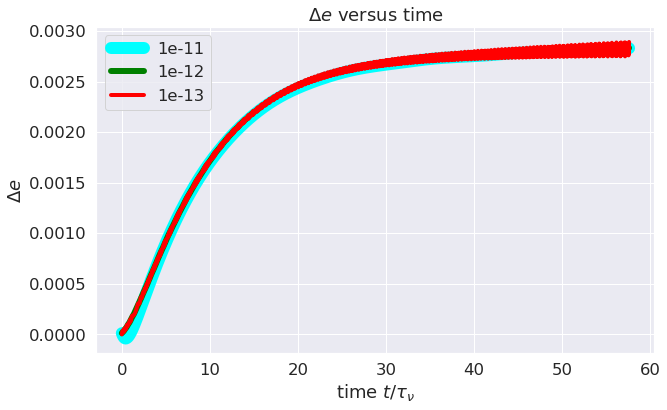

In [7]:
#plot delta_e versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
        
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_e
    x = times_viscous
    y = delta_e
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    p = ax.set_title(r'$\Delta e$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta e$')
    p = plt.legend()

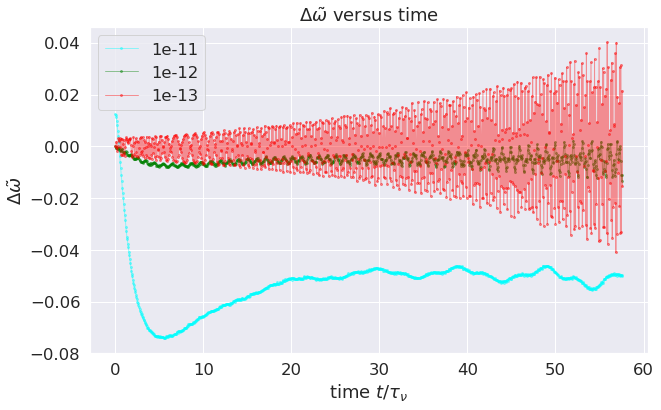

In [8]:
#plot delta_wt versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_wt
    x = times_viscous
    y = delta_wt
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', marker='o', markersize=2, alpha=0.4, color=clr, 
        linewidth=1, label=lbl)
    p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
    p = plt.legend()

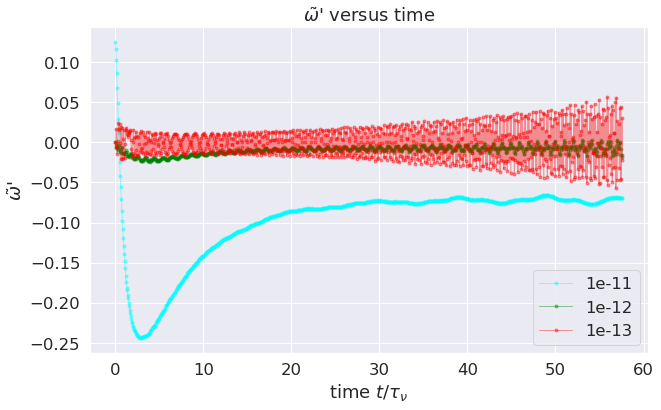

In [9]:
#plot wt_prime versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's wt_prime
    x = times_viscous
    y = wt_prime
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', marker='o', markersize=3, alpha=0.4, color=clr, 
        linewidth=1, label=lbl)
    p = ax.set_title(r"$\tilde{\omega}$' versus time")
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r"$\tilde{\omega}$'")
    p = plt.legend()

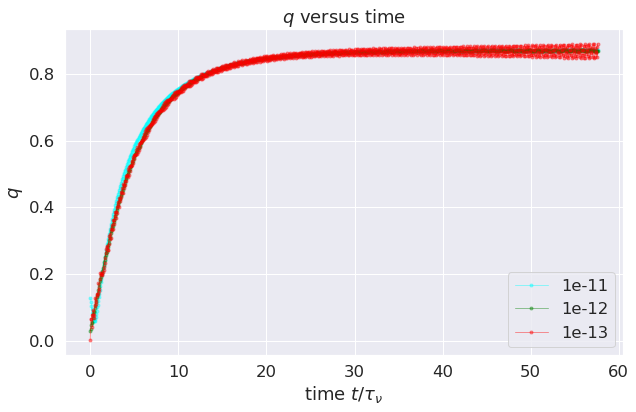

In [10]:
#plot q versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute deltas
    a_inner, a_outer, a_avg, delta_a, e_inner, e_outer, e_avg, delta_e, delta_e_avg, \
    e_prime, e_prime_avg, delta_wt, delta_wt_avg, wt_prime, wt_prime_avg, q, Hq = \
    calculate_Deltas(r, a, e, wt)
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (delta_a[0]**2)/(6*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's q
    x = times_viscous
    y = q
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', marker='o', markersize=3, alpha=0.4, color=clr, 
        linewidth=1, label=lbl)
    p = ax.set_title(r"$q$ versus time")
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r"$q$")
    p = plt.legend()